In [30]:
from tslearn.svm import TimeSeriesSVR
from tslearn.utils import to_time_series_dataset
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [19]:
TRAIN_TEST_SPLIT = 0.8
labels = ['PM2.5_pi', 'PM10_pi']

In [15]:
data = pd.read_csv('model_data_pi.csv')

In [16]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data = data.iloc[:138,:]

In [17]:
data

,temp_pi_t0,hum_pi_t0,PM1_pi_t0,PM2.5_pi_t0,PM10_pi_t0,wind_speed_t0,temp_pi_t1,hum_pi_t1,PM1_pi_t1,PM2.5_pi_t1,...,PM10_pi_t4,wind_speed_t4,temp_pi_t5,hum_pi_t5,PM1_pi_t5,PM2.5_pi_t5,PM10_pi_t5,wind_speed_t5,PM2.5_pi,PM10_pi
0,17.625000,30.933333,4.365000,9.652500,15.223333,9.826088,19.983333,28.125000,4.610000,10.042500,...,15.388333,6.924738,8.316667,53.283333,6.042500,11.798333,17.710000,5.116561,6.641000,9.477000
1,13.990000,35.770000,3.787000,6.641000,9.477000,8.209263,17.625000,30.933333,4.365000,9.652500,...,9.632500,7.421590,13.408333,38.358333,4.840833,10.010000,15.388333,6.924738,10.465000,16.762500
2,12.683333,37.733333,4.529167,10.465000,16.762500,8.496304,13.990000,35.770000,3.787000,6.641000,...,8.284167,6.952755,17.391667,32.191667,5.140833,7.510833,9.632500,7.421590,6.040000,9.553333
3,11.616667,40.350000,2.710000,6.040000,9.553333,7.754637,12.683333,37.733333,4.529167,10.465000,...,15.750000,11.269782,18.650000,30.083333,3.752500,6.064167,8.284167,6.952755,7.147500,10.535000
4,10.425000,42.900000,3.815000,7.147500,10.535000,6.162207,11.616667,40.350000,2.710000,6.040000,...,15.223333,9.826088,19.983333,28.125000,4.610000,10.042500,15.750000,11.269782,7.878333,12.093333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,8.933333,60.208333,3.473333,6.749167,10.107500,5.411986,9.291667,60.083333,2.995833,7.039167,...,7.769091,6.725354,11.908333,55.633333,4.087500,7.718333,11.420000,8.217153,7.871667,13.393333
134,8.225000,63.216667,2.787500,7.871667,13.393333,5.506941,8.933333,60.208333,3.473333,6.749167,...,7.878333,6.569383,11.127273,57.472727,3.157273,5.473636,7.769091,6.725354,5.710833,8.541667
135,7.658333,67.016667,2.947500,5.710833,8.541667,4.320000,8.225000,63.216667,2.787500,7.871667,...,11.719091,5.760000,10.466667,58.158333,3.364167,5.647500,7.878333,6.569383,7.948333,11.751667
136,7.400000,65.883333,4.213333,7.948333,11.751667,4.553679,7.658333,67.016667,2.947500,5.710833,...,11.340000,9.720000,9.872727,59.609091,3.670000,7.613636,11.719091,5.760000,10.420000,16.796667


In [20]:
n = int(TRAIN_TEST_SPLIT*data.shape[0])

X_train = data.iloc[:n,:]
X_test = data.iloc[n:,:]

y_train1 = X_train[labels[0]]
y_train2 = X_train[labels[1]]

y_true1 = X_test[labels[0]]
y_true2 = X_test[labels[1]]

X_train = X_train.drop(labels, axis=1)
X_test = X_test.drop(labels, axis=1)

In [10]:
X = to_time_series_dataset([[1, 2, 3, 4], [1, 2, 3], [2, 5, 6, 7, 8, 9]])
y = [0, 0, 1]

In [21]:
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train1 = np.array(y_train1)
y_train2 = np.array(y_train2)

y_true1 = np.array(y_true1)
y_true2 = np.array(y_true2)

In [42]:
clf = TimeSeriesSVR(C=1.0, kernel="gak")
clf.fit(X_train, y_train1)

TimeSeriesSVR()

In [43]:
y_pred1 = clf.predict(X_test)

In [44]:
mse1 = mean_squared_error(y_true1, y_pred1)
mae1 = mean_absolute_error(y_true1, y_pred1)
print("MSE: {}".format(mse1))
print("MAE: {}".format(mae1))

MSE: 3.9426738041563474
MAE: 1.636988014258426


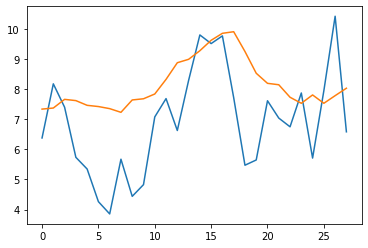

In [31]:
plt.plot(np.arange(len(y_true1)), y_true1)
plt.plot(np.arange(len(y_pred1)), y_pred1)
plt.show()